# Выпускной проект: Анализ товарного ассортимента

## Цель исследования: 

Проанализировать ассортимент товаров интернет-магазина товаров для дома «Пока все ещё тут»

## Задачи:

1. Подготовить данные по товарам и заказам интернет-магазина «Пока все ещё тут» на основе предоставленного датасета
2. Провести анализ данных по товарам и заказам 
3. Проанализировать торговый ассортимент, и выделить основной и дополнительный ассортимент интернет-магазина
4. Провести исследовательский анализ данных по товарам и заказам
5. Сформулировать гипотезы и проверить их
6. Разработать рекомендации по оптимизации ассортимента
7. Разработать презентацию, содержащую результаты исследования 
8. Разработать дашборд на основании исследования

### Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

м Загрузка данных и изучение общей информации

In [118]:
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy import stats as st

In [2]:
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
df_addon = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )

In [3]:
df_addon.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


##### Дату приводим к нужному виду, все остальные данные в правильном формате

In [5]:
df_addon['date'] = pd.to_datetime(df_addon['date'], format='%Y%m%d%H')

In [6]:
# проверяем смену формата
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


In [7]:
# проверяем смену формата
df_addon.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [8]:
df_addon.shape

(7474, 6)

In [9]:
df_addon.describe(include = "all").T

C:\Users\shian\AppData\Local\Temp\ipykernel_356\1771121421.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_addon.describe(include = "all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,7474,3126,2019-04-27 16:00:00,51,2018-10-01,2020-01-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,7474,2451,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,888,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,7474.0,NaN,NaN,NaN,NaT,NaT,49449.884265,32679.642404,12624.0,14833.0,68768.0,71257.75,112789.0
product,7474,2343,Рассада Кабачка сорт Зебра кассета 6 шт E6,79,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,7474.0,NaN,NaN,NaN,NaT,NaT,2.362858,14.500497,1.0,1.0,1.0,1.0,1000.0
price,7474.0,NaN,NaN,NaN,NaT,NaT,478.737501,901.615895,9.0,97.0,135.0,439.0,14917.0


##### Проверяем на дубликаты

In [10]:
df_addon.duplicated().sum()

0

In [11]:
# смотрим кол-во дубликатов по столбцу product
df_addon[df_addon.duplicated(['product'])]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
76,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [12]:
#переводим в нижний регистр столбец product, чтобы сократить кол-во дубликатов
df_addon['product'] = df_addon['product'].str.lower()

In [13]:
#также заменим в данных все ё на е (на первый взгляд данных с ё не много, но это может помочь по некоторым дубликатам)
df_addon['product'] = df_addon['product'].str.replace('ё', 'е')

In [14]:
#также заменим в данных все ' , ' на ' ' 
#df_addon['product'] = df_addon['product'].str.replace(',', ' ')

In [15]:
df_addon[df_addon.duplicated(['product'])]

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
76,2018-10-04 09:00:00,e64aad3a-fffc-4193-8df5-e94a43eff295,68521,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [16]:
# смотрим кол-во дубликатов по столбцу order_id
df_addon[df_addon.duplicated(['order_id'])]

,date,customer_id,order_id,product,quantity,price
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0


In [17]:
# смотрим кол-во дубликатов по столбцу customer_id
df_addon[df_addon.duplicated(['customer_id'])]

,date,customer_id,order_id,product,quantity,price
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [18]:
# проверяем на неявные дубликаты
df_customer = df_addon['customer_id']
df_customer.sort_values()
sorted(df_customer.unique())

['000d6849-084e-4d9f-ac03-37174eaf60c4',
 '001cee7f-0b29-4716-b202-0042213ab038',
 '00299f34-5385-4d13-9aea-c80b81658e1b',
 '002d4d3a-4a59-406b-86ec-c3314357e498',
 '003bbd39-0000-41ff-b7f9-2ddaec152037',
 '004d24e9-4a6c-4d0e-8727-8391dfd4b43a',
 '005ba170-45e8-42de-93f7-192481ae2659',
 '00bd74b1-2792-47db-a2f1-680a09ac5026',
 '00c0f92a-121a-4883-a78d-2c7b5fe187de',
 '00c95d20-923e-4b45-88fc-53b12931d462',
 '00cd704a-a65c-4865-b39a-779f1b4f1d1a',
 '00e59a12-06d5-47fc-9a33-bfc53aca1e9f',
 '00ff5327-0fba-481c-8a07-47a95093a213',
 '0114e87e-78e2-49bf-9c8c-bbddd7191a3f',
 '0131d2f9-e553-4cb6-ac85-f96e9cb7cb47',
 '0161a155-59b3-4613-a6ff-2e6bfcc00463',
 '01626eda-0717-4a39-826e-1982a358576d',
 '0184f535-b60a-4914-a982-231e3f615206',
 '018dc738-2846-464d-a421-126a8ed64bc5',
 '018fb729-3525-4314-8e4d-1982b1062f9f',
 '019ddfb4-f9fe-4b17-88bb-0ec9edb56479',
 '01a53da1-c3ae-47cf-916e-7e345fe2f2bc',
 '01bd5b9a-2b4e-483c-95a3-40b040c392e8',
 '01c31cf3-cdb3-4b90-a2ef-ebe1b9e1fc33',
 '01ca3206-da26-

In [19]:
df_addon['customer_id'].sort_values().nunique()

2451

In [20]:
df_order = df_addon['order_id']
df_order.sort_values()
sorted(df_order.unique())

[12624,
 13547,
 14480,
 14481,
 14482,
 14485,
 14486,
 14487,
 14490,
 14494,
 14496,
 14497,
 14498,
 14499,
 14500,
 14501,
 14503,
 14504,
 14505,
 14507,
 14509,
 14510,
 14511,
 14512,
 14513,
 14514,
 14516,
 14521,
 14522,
 14525,
 14526,
 14527,
 14529,
 14530,
 14531,
 14532,
 14534,
 14535,
 14537,
 14538,
 14540,
 14541,
 14542,
 14543,
 14544,
 14545,
 14546,
 14547,
 14548,
 14549,
 14550,
 14552,
 14553,
 14554,
 14555,
 14557,
 14559,
 14560,
 14561,
 14562,
 14563,
 14565,
 14566,
 14567,
 14568,
 14569,
 14570,
 14572,
 14575,
 14578,
 14580,
 14581,
 14588,
 14590,
 14595,
 14596,
 14597,
 14600,
 14601,
 14604,
 14606,
 14608,
 14611,
 14612,
 14614,
 14615,
 14616,
 14617,
 14619,
 14621,
 14623,
 14624,
 14625,
 14626,
 14627,
 14628,
 14629,
 14631,
 14634,
 14637,
 14638,
 14639,
 14640,
 14641,
 14642,
 14644,
 14645,
 14646,
 14649,
 14651,
 14652,
 14653,
 14655,
 14657,
 14663,
 14664,
 14666,
 14668,
 14669,
 14671,
 14673,
 14674,
 14679,
 14680,
 14682,


In [21]:
df_addon['order_id'].sort_values().nunique()

3521

In [22]:
df_product = df_addon['product']
df_product.sort_values()
sorted(df_product.unique())

['tepмокружка avex freeflow 700 мл зеленый avex0759',
 'tepмокружка avex freeflow 700 мл сталь avex0776',
 'tepмокружка avex recharge 500 мл голубой avex0681',
 'автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114',
 'агератум рассада однолетних цветов в кассете по 10 шт',
 'адиантум лиза d-12 см',
 'азалия индика биколор d-12 см',
 'азалия индика биколор d-12 см h-20',
 'азалия индика розовая d-12 см h-20',
 'азалия индика фиолетовая d-10 см h-20',
 'аквилегия махровая тауэр смесь окрасок объем 1 л',
 'аквилегия обыкновенная барлоу микс объем 1 л',
 'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302',
 'алиссум рассада однолетних цветов в кассете по 10 шт',
 'алиссум рассада однолетних цветов в кассете по 6 шт',
 'алиссум скальный желтый объем 1 л',
 'алоэ вера d-12 см h-25 см',
 'альбука спиралис фризл-сизл d-12 см',
 'амариллис red lion темно-красный в горшке d-12 см 1 луковица',
 'анемона белый объем 0,5 л',
 'антижир posh one magnum 828 мл россия 4580390-927058

In [23]:
df_addon['product'].sort_values().nunique()

2341

In [24]:
#проверим кол-во дубликов по 4 столбцам
df_addon[['product','order_id', 'customer_id', 'quantity', 'price']].duplicated().sum()


1864

In [25]:
#duplicated = df_addon[df_addon.duplicated(['product','order_id', 'customer_id', 'quantity', 'price'])]
#duplicated = duplicated.sort_values(by = ["order_id", "product"])
#duplicated.head(20)

In [26]:
#print(df_addon[df_addon.duplicated(['product','order_id', 'customer_id', 'quantity', 'price'])].shape[0] / len(df_addon))

#### Наши дубликаты это воронка продаж по заказам (история заказа), поэтому мы отставим только заказ с последней датой

In [27]:
df_addon.shape

(7474, 6)

In [28]:
duplicated = df_addon[df_addon.duplicated(['product','order_id', 'customer_id', 'quantity', 'price'])]
duplicated

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409.0
...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,мирт d-9 см h-15 см,1,134.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0


In [29]:
duplicated_sort = duplicated.sort_values('date').groupby(['order_id']).head(-1)
duplicated_sort

,date,customer_id,order_id,product,quantity,price
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 ...,1,3299.0
150,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 24,0 л пищевой круглый (иж),...",1,239.0
149,2018-10-08 19:00:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 20,0 л пищевой (минеральные ...",1,277.0
...,...,...,...,...,...,...
6670,2019-10-21 12:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6673,2019-10-22 09:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0
6700,2019-10-27 16:00:00,b89ace7f-7017-408c-8755-c4ff39b50980,73104,циперус зумула d-12 см h-25 см,2,112.0
6705,2019-10-28 08:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,сумка-тележка 2-х колесная gimi argo красная,1,1087.0


In [30]:
duplicated_ratio = len(duplicated) / len(df_addon)
duplicated_ratio = round(duplicated_ratio, 2)

print("Доля дубликатов: {}%".format(duplicated_ratio * 100))

Доля дубликатов: 25.0%


In [31]:
filter_duble = duplicated_sort['order_id'].tolist()
df_addon = df_addon.query("order_id not in @filter_duble")
df_addon.shape

(5368, 6)

In [32]:
# проверим, что удалили все дубликаты
df_addon[['product','order_id', 'customer_id', 'quantity', 'price']].duplicated().sum()


146

In [33]:
duble = df_addon[df_addon.duplicated(['product','order_id', 'customer_id', 'quantity', 'price'])]

In [34]:
duble_sorted = duble.sort_values('date').groupby(['order_id']).head(-1)
duble_sorted

,date,customer_id,order_id,product,quantity,price


##### Проверяем на пропуски

In [35]:
df_addon.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

##### Проверяем на аномальные значения

In [36]:
df_addon.describe(include = "all").T

C:\Users\shian\AppData\Local\Temp\ipykernel_356\1771121421.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_addon.describe(include = "all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,5368,2773,2019-04-27 16:00:00,51,2018-10-01,2020-01-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,5368,2355,c971fb21-d54c-4134-938f-16b62ee86d3b,144,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,5368.0,NaN,NaN,NaN,NaT,NaT,58083.80123,31764.831649,12624.0,14831.75,69538.0,72087.25,112789.0
product,5368,2254,пеларгония розебудная red pandora укорененный ...,66,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,5368.0,NaN,NaN,NaN,NaT,NaT,2.608234,16.520367,1.0,1.0,1.0,1.0,1000.0
price,5368.0,NaN,NaN,NaN,NaT,NaT,550.466111,986.272004,9.0,97.0,157.0,584.0,14917.0


##### По столбцу price достаточно большое стандартное отклонение, большая разница между средней и медианой, а также аномально большое максимальное значение. По столбцу quantity, аномальное значение в  квартиле. Посмотрим подробнее по данным столбцам 

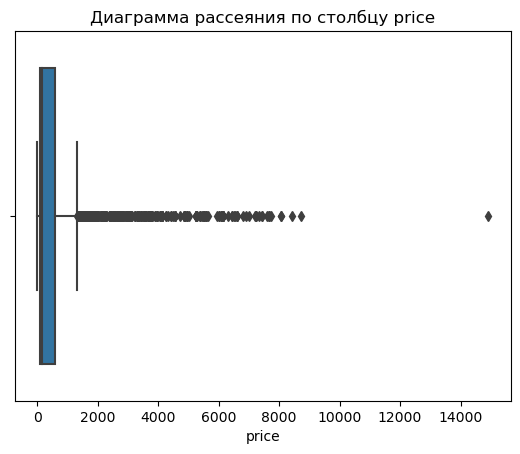

In [37]:
ax = sns.boxplot(x=df_addon ['price']) 

ax.set_title('Диаграмма рассеяния по столбцу price')

plt.show()

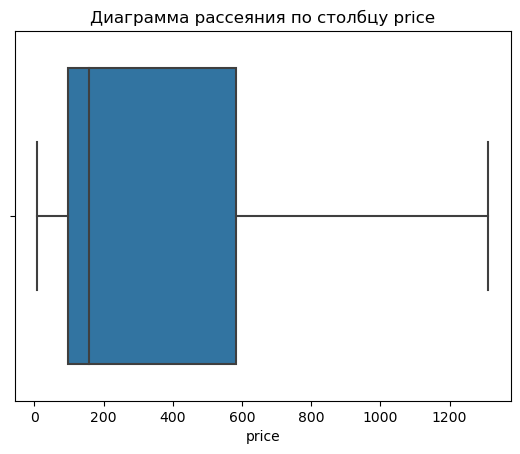

In [38]:
ax = sns.boxplot(x=df_addon ['price'], showfliers=False) 

ax.set_title('Диаграмма рассеяния по столбцу price')

plt.show()

In [39]:
#смотрим процент данных
(df_addon['price'] > 1100).mean() 

0.13021609538002982

In [40]:
#найдем значение, соответствующее 1% аномальных данных
(df_addon['price'] > 5100).mean()

0.011363636363636364

In [41]:
#удалим 1% аномальных значений
df_addon.drop(index=df_addon.query('price > 5100').index,inplace=True)

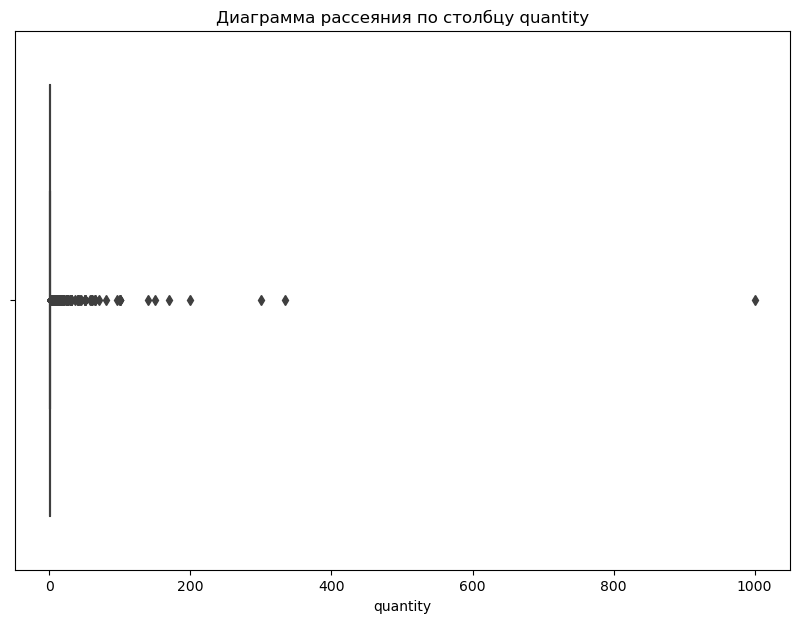

In [42]:
ax = sns.boxplot(x=df_addon ['quantity']) 

ax.set_title('Диаграмма рассеяния по столбцу quantity')
ax.figure.set_size_inches(10, 7) 

plt.show()

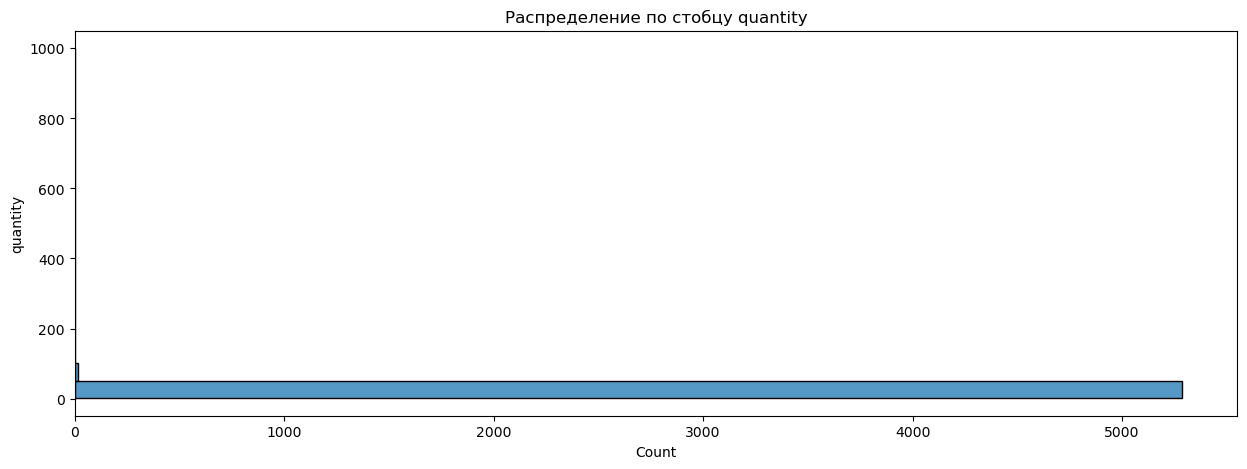

In [43]:
ax = sns.histplot(data=df_addon, y='quantity', bins=20, kde=False)

ax.set_title('Распределение quantity')  
ax.figure.set_size_inches(15, 5)

plt.title('Распределение по стобцу quantity')
plt.show()

In [44]:
#смотрим процент данных
(df_addon['quantity'] > 1).mean() 

0.20576596947427925

In [45]:
#найдем значение, соответствующее 1% аномальных данных
(df_addon['quantity'] > 150).mean()

0.000942151874882231

In [46]:
#удалим 1% аномальных значений
df_addon.drop(index=df_addon.query('quantity > 150').index,inplace=True)

##### Проверяем, что у товаров в одном заказе один покупатель и при необходимости, удаляем

In [47]:
unique = df_addon.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1')#.reset_index()
unique.count()

customer_id    24
dtype: int64

In [48]:
len(df_addon)

5302

In [49]:
df_addon.drop(index=df_addon.query('order_id in @unique.index').index,inplace=True)

In [50]:
len(df_addon)

5247

##### Создадим столбец с месяцем и годом, днем недели и часом

In [51]:
df_addon['year'] = df_addon['date'].dt.year
df_addon['month'] = df_addon['date'].dt.month#astype('datetime64[M]')
df_addon['day'] = (df_addon['date'].dt.dayofweek) + 1
df_addon['hours'] = df_addon['date'].dt.hour

In [52]:
#df_addon['month'] = pd.to_datetime(df_addon['date'], format = '%Y%m')

In [53]:
df_addon.head()

,date,customer_id,order_id,product,quantity,price,year,month,day,hours
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0


##### Создадим столбец с общей суммой за заказ

In [54]:
df_addon['sum_total'] = df_addon['quantity'] * df_addon['price']
df_addon.head()

,date,customer_id,order_id,product,quantity,price,year,month,day,hours,sum_total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0,112.0


<div style="border:solid purple 3px; padding: 20px">
Выполнили предобработку данных, у всех данных верный формат, кроме времени, его поменяли. Проверили данные на пропуски, их не оказалось. Более 24% дубликатов удалили, т.к. это дубли одних и тех же заказов. Также проверили данные на то, чтобы в одном заказе был один покупатель. Обнаружили 29 заказов, их также удалили. Затем создали столбцы по году, месяцу, дню недели, времени и столбец с суммой заказа

## Анализ данных

##### Проверим период, за который предосталены данные

In [55]:
df_addon['date'].min()

Timestamp('2018-10-01 00:00:00')

In [56]:
df_addon['date'].max()

Timestamp('2020-01-31 15:00:00')

##### Посмотрим период, в который больше всего продаж в разбивке по месяцам с учетом года, дня недели и времени

In [57]:
orders_per_day = df_addon.groupby('day')['order_id'].nunique().reset_index()
orders_per_day

,day,order_id
0,1,563
1,2,575
2,3,515
3,4,536
4,5,449
5,6,335
6,7,428


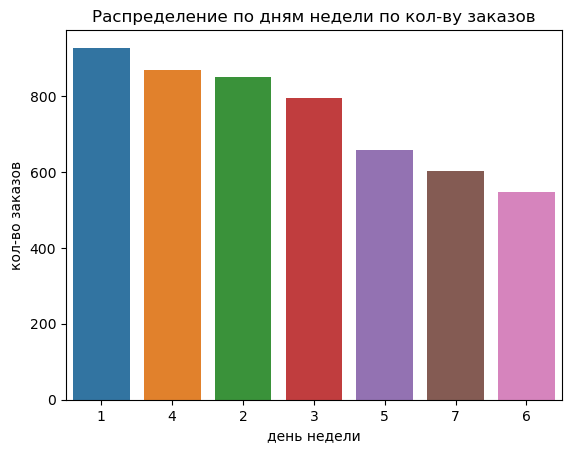

In [58]:
df_addon_grouped = df_addon.groupby('day')['order_id'].agg(['count']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('count', ascending=False)

order = df_addon_grouped['day'].values

ax = sns.barplot(data=df_addon_grouped, x='day', y='count', order=order)

plt.xlabel('день недели')
plt.ylabel('кол-во заказов')
plt.title('Распределение по дням недели по кол-ву заказов')
plt.show()


In [59]:
amount_per_day = df_addon.groupby('day')['price'].sum().reset_index().round(2)
amount_per_day

,day,price
0,1,399324.33
1,2,408195.50
2,3,401640.17
3,4,405045.33
4,5,337294.75
5,6,260786.50
6,7,320128.50


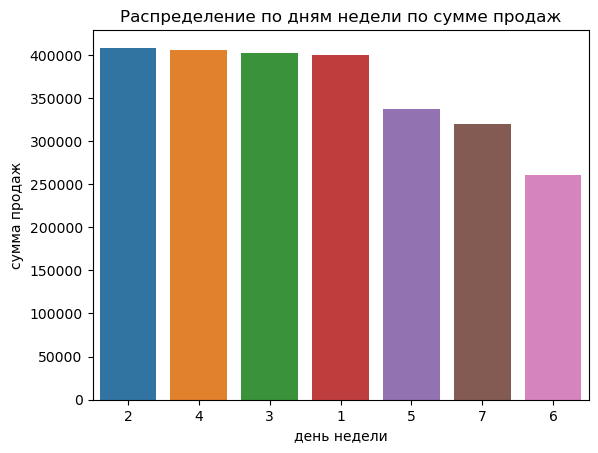

In [60]:
df_addon_grouped = df_addon.groupby('day')['price'].agg(['sum']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('sum', ascending=False)

order = df_addon_grouped['day'].values

ax = sns.barplot(data=df_addon_grouped, x='day', y='sum', order=order)

plt.xlabel('день недели')
plt.ylabel('сумма продаж')
plt.title('Распределение по дням недели по сумме продаж')
plt.show()


In [61]:
orders_per_hour = df_addon.groupby('hours')['order_id'].nunique().reset_index().sort_values('order_id', ascending=False) 
orders_per_hour

,hours,order_id
11,11,290
12,12,270
10,10,265
13,13,263
14,14,252
15,15,243
9,9,210
16,16,198
17,17,185
21,21,177


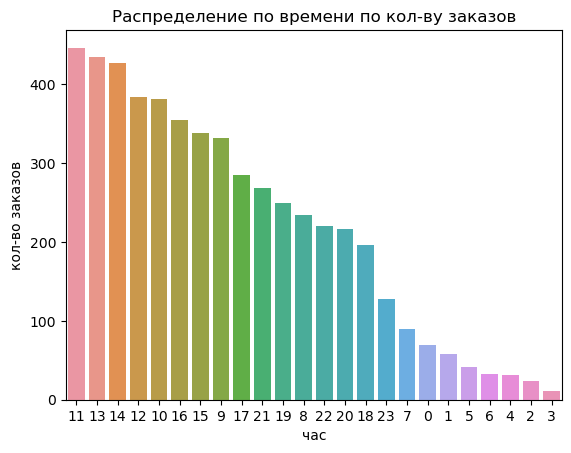

In [62]:
df_addon_grouped = df_addon.groupby('hours')['order_id'].agg(['count']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('count', ascending=False)

order = df_addon_grouped['hours'].values

ax = sns.barplot(data=df_addon_grouped, x='hours', y='count', order=order)

plt.xlabel('час')
plt.ylabel('кол-во заказов')
plt.title('Распределение по времени по кол-ву заказов')
plt.show()

In [63]:
amount_per_hour = df_addon.groupby('hours')['price'].sum().reset_index().round(2).sort_values('price', ascending=False) 
amount_per_hour

,hours,price
11,11,215426.50
12,12,203773.67
14,14,191463.50
13,13,180704.33
10,10,167175.17
15,15,163362.17
9,9,152188.00
17,17,148417.00
16,16,141976.50
21,21,136431.67


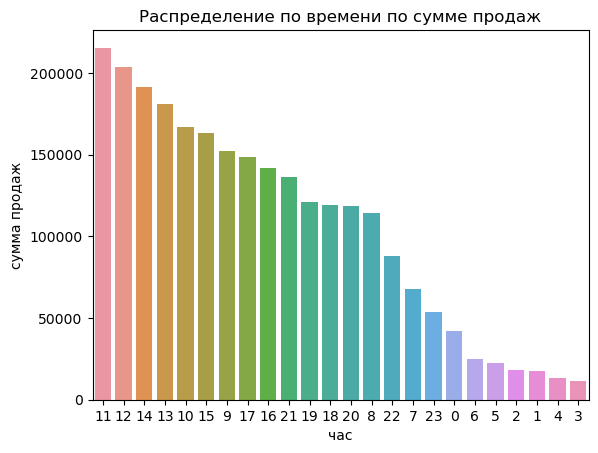

In [64]:
df_addon_grouped = df_addon.groupby('hours')['price'].agg(['sum']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('sum', ascending=False)

order = df_addon_grouped['hours'].values

ax = sns.barplot(data=df_addon_grouped, x='hours', y='sum', order=order)

plt.xlabel('час')
plt.ylabel('сумма продаж')
plt.title('Распределение по времени по сумме продаж')
plt.show()

In [65]:
df_addon['month_year'] = df_addon['month'].astype(str) + '-' + df_addon['year'].astype(str)
df_addon.head()

,date,customer_id,order_id,product,quantity,price,year,month,day,hours,sum_total,month_year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0,142.0,10-2018
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0,194.0,10-2018
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0,112.0,10-2018
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0,179.0,10-2018
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0,112.0,10-2018


In [66]:
orders_per_month = df_addon.groupby('month_year')['order_id'].nunique().reset_index()
orders_per_month.sort_values('order_id', ascending=False)

,month_year,order_id
8,2-2019,273
6,12-2018,267
1,1-2020,265
10,4-2019,245
7,12-2019,239
2,10-2018,229
9,3-2019,225
5,11-2019,214
4,11-2018,191
3,10-2019,190


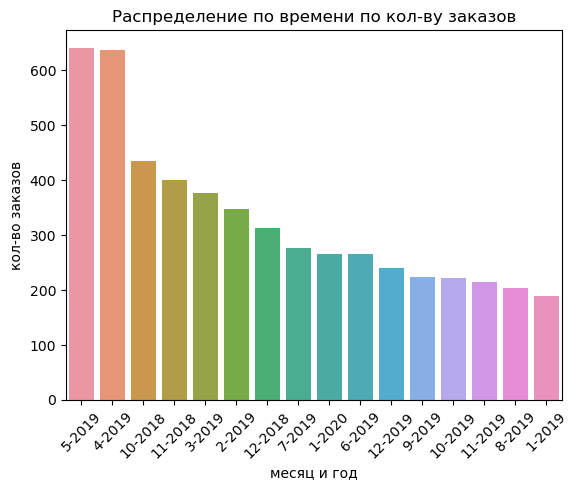

In [67]:
df_addon_grouped = df_addon.groupby('month_year')['order_id'].agg(['count']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('count', ascending=False)

order = df_addon_grouped['month_year'].values

ax = sns.barplot(data=df_addon_grouped, x='month_year', y='count', order=order)

plt.xlabel('месяц и год')
plt.ylabel('кол-во заказов')
plt.title('Распределение по времени по кол-ву заказов')
plt.xticks(rotation=45)
plt.show()

In [68]:
amount_per_month = df_addon.groupby('month_year')['price'].sum().reset_index().round(2).sort_values('price', ascending=False) 
amount_per_month

,month_year,price
2,10-2018,242265.00
6,12-2018,230333.00
4,11-2018,201617.00
8,2-2019,200533.00
9,3-2019,171345.00
10,4-2019,161421.00
13,7-2019,153014.00
3,10-2019,147535.00
14,8-2019,143892.00
15,9-2019,140668.00


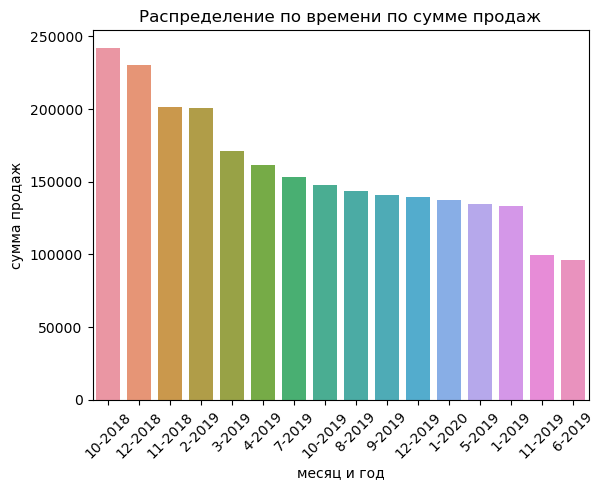

In [69]:
df_addon_grouped = df_addon.groupby('month_year')['price'].agg(['sum']).reset_index()

df_addon_grouped = df_addon_grouped.sort_values('sum', ascending=False)

order = df_addon_grouped['month_year'].values

ax = sns.barplot(data=df_addon_grouped, x='month_year', y='sum', order=order)

plt.xlabel('месяц и год')
plt.ylabel('сумма продаж')
plt.title('Распределение по времени по сумме продаж')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid purple 3px; padding: 20px">
В датасете представлены данные за период с 01.10.2018 по 31.01.2020. 

Больше всего заказов по кол-ву и по сумме в пн и вт, меньше в сб, вс. 
По часам больше заказов в период с 12 по 13 часов. Пик в 13 часов. По сумме с 11 по 14 часов. Пик 11-12. 
    
Меньше всего по кол-ву и по сумме ночью с 12 часов до утра 7. 

Самое большое кол-во заказов по месяцам с учетом года февраль 2019, декабрь 2018 (также по сумме продаж), меньше всего заказов в январе и июне 2019 (также по сумме продаж). По сумме продаж также декабрь 2018 и октябрь 2018. Меньше продаж по сумме ноябрь 2019 и июнь 2019.

##### Выявим наиболее популярные товары по продажам по кол-ву и по сумме продаж

In [70]:
df_addon

,date,customer_id,order_id,product,quantity,price,year,month,day,hours,sum_total,month_year
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018,10,1,0,142.0,10-2018
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018,10,1,0,194.0,10-2018
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018,10,1,0,112.0,10-2018
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018,10,1,0,179.0,10-2018
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018,10,1,0,112.0,10-2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,2020,1,4,21,76.0,1-2020
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,2020,1,4,22,869.0,1-2020
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,2020,1,5,2,354.0,1-2020
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,2020,1,5,12,128.0,1-2020


In [71]:
# посмотрим топ 15 товаров по кол-ву заказов
orders_product = df_addon.groupby('product')['order_id'].nunique().reset_index()
orders_product = orders_product.sort_values('order_id', ascending=False).head (15)
orders_product

,product,order_id
977,пеларгония розебудная red pandora укорененный ...,61
949,пеларгония зональная диам. 12 см сиреневый пол...,49
975,пеларгония розебудная prins nikolai укорененны...,49
1532,сумка-тележка 2-х колесная gimi argo синяя,44
974,пеларгония розебудная mary укорененный черенок,38
976,пеларгония розебудная queen ingrid укорененный...,29
973,пеларгония розебудная margaretha укорененный ч...,27
957,пеларгония зональная махровая лососевая,25
930,пеларгония зональная диам. 12 см коралловая по...,24
963,пеларгония зональная ринго вайт d-7 см h-10 см...,24


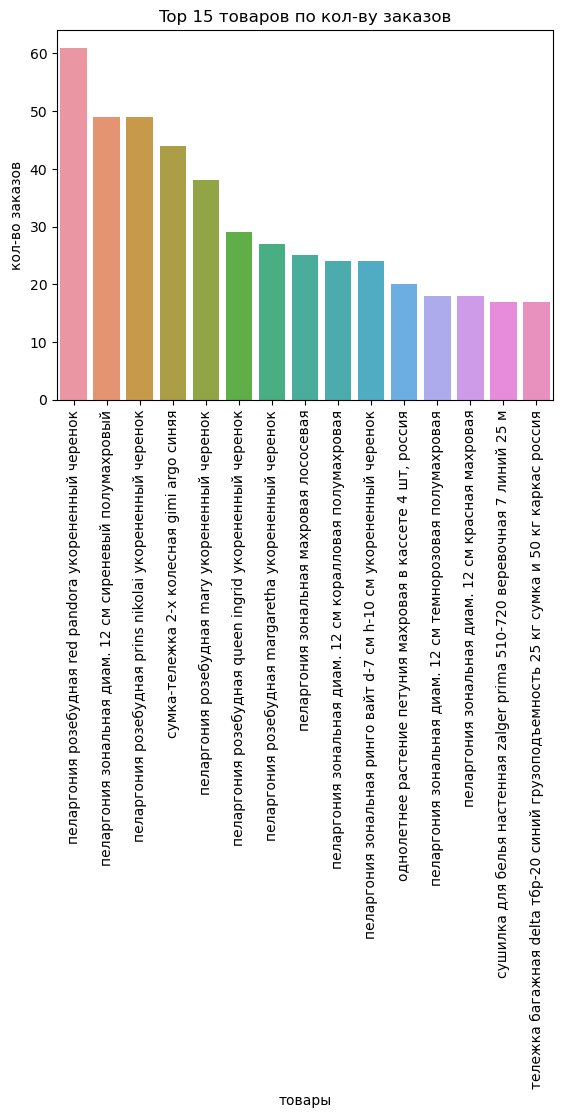

In [72]:
ax = sns.barplot(x='product', y='order_id', data=orders_product)

ax.set_xlabel('товары')  
ax.set_ylabel('кол-во заказов')
ax.set_title('Top 15 товаров по кол-ву заказов')
plt.xticks(rotation=90)

plt.show()

In [73]:
# посмотрим топ 15 товаров по сумме продаж
price_product = df_addon.groupby('product')['price'].sum().reset_index()
price_product = price_product.sort_values('price', ascending=False).head (15)
price_product

,product,price
1532,сумка-тележка 2-х колесная gimi argo синяя,52579.00
255,гладильная доска ника blues 124х46 см 5757,22840.00
1539,сумка-тележка 2-х колесная gimi galaxy черная,19568.00
1543,сумка-тележка 3-х колесная gimi tris floral синяя,18893.00
1557,сумка-тележка хозяйственная andersen scala sho...,18296.00
1541,сумка-тележка 2-х колесная складная gimi flexi...,18139.00
240,гладильная доска sarayli new elegant 125x45 см,17843.00
1553,"сумка-тележка twin стальной каркас 56 л синяя,...",15444.00
1555,сумка-тележка хозяйственная andersen scala sho...,15148.00
1569,сумка-тележка хозяйственная gimi market синяя,14992.00


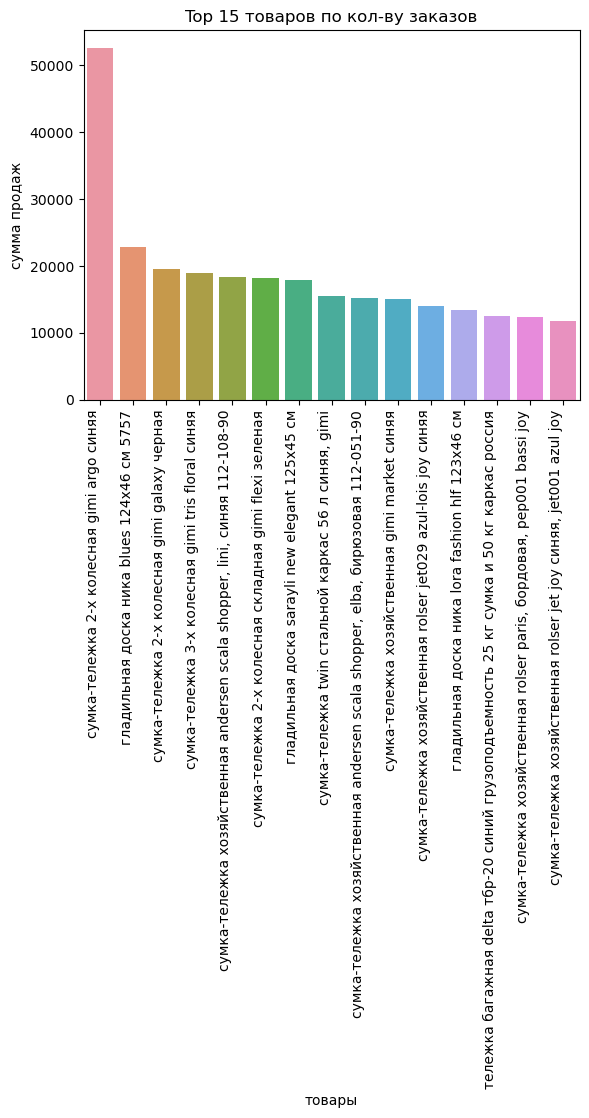

In [74]:
ax = sns.barplot(x='product', y='price', data=price_product)

ax.set_xlabel('товары')  
ax.set_ylabel('сумма продаж')
ax.set_title('Top 15 товаров по кол-ву заказов')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

<div style="border:solid purple 3px; padding: 20px">
Больше всего было продано по сумме продаж - сумка-тележка 2-х колесная gimi argo синяя, топ -3 по прдажам это сумки тележки, также большая часть топа это сумки тележки в разных конфигурациях. 
    
Больше всего по кол-ву было продано пеларгония розебудная red pandora, также большую часть топа занимают данные растения.     

### Анализ ассортимента

##### Рассмотрим ассортимент

In [75]:
unique_products = len(df_addon['product'].unique())
print('Кол-во уникальных товаров:', unique_products)

Кол-во уникальных товаров: 2210


##### Выделим категории товаров

In [76]:
df_addon['product'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5247 entries, 0 to 7473
Series name: product
Non-Null Count  Dtype 
--------------  ----- 
5247 non-null   object
dtypes: object(1)
memory usage: 82.0+ KB


In [77]:
df_addon['product'] = df_addon['product'].astype(str)
df_addon['product'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5247 entries, 0 to 7473
Series name: product
Non-Null Count  Dtype 
--------------  ----- 
5247 non-null   object
dtypes: object(1)
memory usage: 82.0+ KB


In [78]:
df_addon['product']

0         комнатное растение в горшке алое вера, d12, h30
1       комнатное растение в горшке кофе арабика, d12,...
2                             радермахера d-12 см h-20 см
3                        хризолидокарпус лутесценс d-9 см
4                          циперус зумула d-12 см h-25 см
                              ...                        
7469    томата (помидор) черниченский черри № 116 сорт...
7470           дендробиум санок анна грин 1 ствол d-12 см
7471    подставка для обуви резиновая attribute 80x40 ...
7472    тагетис крупноцветковый рассада однолетних цве...
7473    вешалка для блузок 41 см красный attribute ahm781
Name: product, Length: 5247, dtype: object

In [79]:
df_addon['product'] = df_addon['product'].str.lower()
df_addon['product'] = df_addon['product'].str.strip()
df_addon['product']

0         комнатное растение в горшке алое вера, d12, h30
1       комнатное растение в горшке кофе арабика, d12,...
2                             радермахера d-12 см h-20 см
3                        хризолидокарпус лутесценс d-9 см
4                          циперус зумула d-12 см h-25 см
                              ...                        
7469    томата (помидор) черниченский черри № 116 сорт...
7470           дендробиум санок анна грин 1 ствол d-12 см
7471    подставка для обуви резиновая attribute 80x40 ...
7472    тагетис крупноцветковый рассада однолетних цве...
7473    вешалка для блузок 41 см красный attribute ahm781
Name: product, Length: 5247, dtype: object

In [80]:
df_addon['product'] = df_addon['product'].str.replace('\s+', ' ', regex=True)

In [81]:
words = df_addon['product'].str.split()
words

0       [комнатное, растение, в, горшке, алое, вера,, ...
1       [комнатное, растение, в, горшке, кофе, арабика...
2                       [радермахера, d-12, см, h-20, см]
3                   [хризолидокарпус, лутесценс, d-9, см]
4                   [циперус, зумула, d-12, см, h-25, см]
                              ...                        
7469    [томата, (помидор), черниченский, черри, №, 11...
7470    [дендробиум, санок, анна, грин, 1, ствол, d-12...
7471    [подставка, для, обуви, резиновая, attribute, ...
7472    [тагетис, крупноцветковый, рассада, однолетних...
7473    [вешалка, для, блузок, 41, см, красный, attrib...
Name: product, Length: 5247, dtype: object

In [82]:
pairs = [tuple(words[:2]) for words in words if len(words[0]) > 3 and len(words[1]) > 3]

pairs

[('комнатное', 'растение'),
 ('комнатное', 'растение'),
 ('радермахера', 'd-12'),
 ('хризолидокарпус', 'лутесценс'),
 ('циперус', 'зумула'),
 ('шеффлера', 'лузеана'),
 ('юкка', 'нитчатая'),
 ('настенная', 'сушилка'),
 ('чехол', 'eurogold'),
 ('крючок', 'одежный'),
 ('корзина', 'мягкая'),
 ('многолетнее', 'растение'),
 ('рассада', 'зелени'),
 ('рассада', 'зелени'),
 ('муляж', '"райские'),
 ('муляж', 'банан,'),
 ('муляж', 'виноград'),
 ('муляж', 'гранат'),
 ('муляж', 'груша'),
 ('муляж', 'груша,'),
 ('муляж', 'зеленое'),
 ('муляж', 'клубника'),
 ('муляж', 'клубника'),
 ('муляж', 'красное'),
 ('муляж', 'лимон,'),
 ('муляж', 'мандарин,'),
 ('муляж', 'перец,'),
 ('муляж', 'перец,'),
 ('муляж', 'персики'),
 ('муляж', 'томат,'),
 ('муляж', 'черешня'),
 ('тарелка', 'обеденная'),
 ('вилка', 'столовая'),
 ('ложка', 'столовая'),
 ('ложка', 'чайная'),
 ('герань', 'домашняя'),
 ('пеларгония', 'зональная'),
 ('пеларгония', 'зональная'),
 ('пеларгония', 'зональная'),
 ('пеларгония', 'зональная'),
 ('

In [83]:
pairs_dict = {}

for pair in pairs:
  if pair not in pairs_dict:
    pairs_dict[pair] = 1
  else:
    pairs_dict[pair] += 1

print(f"Количество уникальных пар слов: {len(pairs_dict)}")

Количество уникальных пар слов: 703


In [84]:
for pair in list(pairs_dict)[:]:
  print(pair)

('комнатное', 'растение')
('радермахера', 'd-12')
('хризолидокарпус', 'лутесценс')
('циперус', 'зумула')
('шеффлера', 'лузеана')
('юкка', 'нитчатая')
('настенная', 'сушилка')
('чехол', 'eurogold')
('крючок', 'одежный')
('корзина', 'мягкая')
('многолетнее', 'растение')
('рассада', 'зелени')
('муляж', '"райские')
('муляж', 'банан,')
('муляж', 'виноград')
('муляж', 'гранат')
('муляж', 'груша')
('муляж', 'груша,')
('муляж', 'зеленое')
('муляж', 'клубника')
('муляж', 'красное')
('муляж', 'лимон,')
('муляж', 'мандарин,')
('муляж', 'перец,')
('муляж', 'персики')
('муляж', 'томат,')
('муляж', 'черешня')
('тарелка', 'обеденная')
('вилка', 'столовая')
('ложка', 'столовая')
('ложка', 'чайная')
('герань', 'домашняя')
('пеларгония', 'зональная')
('котел', 'алюминиевый')
('суккулент', 'микс')
('эхеверия', 'перл')
('набор', 'прищепок')
('коврик', 'придверный')
('коврик', 'bacchetta')
('корзина', 'пластиковая')
('набор', 'кружек')
('коврик', 'интерьерный')
('эвкалипт', 'гунни')
('муляж', 'виноград,')


In [85]:
unique_words = set([word for wordlist in pairs for word in wordlist])
unique_words

{'"райские',
 '(глоксиния)',
 '(лобулярия)',
 '(очиток)',
 '(полынь',
 '(помидор)',
 '(ромашка)',
 '150х120',
 '214х150',
 '350х150',
 '350х180',
 '40х40',
 'aloha',
 'alparaisa',
 'alpenkok',
 'ampari',
 'angeleyes',
 'attribute',
 'aura',
 'avex',
 'baby',
 'bacchetta',
 'bella',
 'bloomtastic',
 'blue',
 'bolero',
 'bordeaux',
 'brava',
 'city',
 'colombo',
 'crazytunia',
 'curver',
 'd-10',
 'd-11',
 'd-12',
 'd-13',
 'd-15',
 'd-17',
 'd-20',
 'd-23',
 'dark',
 'dasch',
 'delta',
 'dogrular',
 'eurogold',
 'extra',
 'fabrikators',
 'framar',
 'fuhcsia',
 'gimi',
 'hard',
 'infinity',
 'karna',
 'knit',
 'latex',
 'leifheit',
 'louvre',
 'luminarc',
 'meiwa',
 'mini',
 'natures',
 'orange',
 'pasabahce',
 'pegasus',
 'pickwick',
 'posh',
 'potunia',
 'protec',
 'qwerty',
 'rave',
 'rozenbal',
 'sanguna',
 'sarayli',
 'scovo',
 'silver',
 'sochi',
 'surfinia',
 'surprice',
 'surprise',
 'sweet',
 'sweetunia',
 'swingtime',
 'tepмокружка',
 'toscana',
 'towa',
 'twin',
 'valiant',
 '

In [86]:
filtered_pairs = []
for pair in pairs:
    if pair[0] in unique_words or pair[1] in unique_words:
        filtered_pairs.append(pair)

In [87]:
all_words = [x for pair in filtered_pairs for x in pair]
all_words

['комнатное',
 'растение',
 'комнатное',
 'растение',
 'радермахера',
 'd-12',
 'хризолидокарпус',
 'лутесценс',
 'циперус',
 'зумула',
 'шеффлера',
 'лузеана',
 'юкка',
 'нитчатая',
 'настенная',
 'сушилка',
 'чехол',
 'eurogold',
 'крючок',
 'одежный',
 'корзина',
 'мягкая',
 'многолетнее',
 'растение',
 'рассада',
 'зелени',
 'рассада',
 'зелени',
 'муляж',
 '"райские',
 'муляж',
 'банан,',
 'муляж',
 'виноград',
 'муляж',
 'гранат',
 'муляж',
 'груша',
 'муляж',
 'груша,',
 'муляж',
 'зеленое',
 'муляж',
 'клубника',
 'муляж',
 'клубника',
 'муляж',
 'красное',
 'муляж',
 'лимон,',
 'муляж',
 'мандарин,',
 'муляж',
 'перец,',
 'муляж',
 'перец,',
 'муляж',
 'персики',
 'муляж',
 'томат,',
 'муляж',
 'черешня',
 'тарелка',
 'обеденная',
 'вилка',
 'столовая',
 'ложка',
 'столовая',
 'ложка',
 'чайная',
 'герань',
 'домашняя',
 'пеларгония',
 'зональная',
 'пеларгония',
 'зональная',
 'пеларгония',
 'зональная',
 'пеларгония',
 'зональная',
 'котел',
 'алюминиевый',
 'суккулент',
 'м

In [88]:
words1 = [x[0] for x in pairs]
words2 = [x[1] for x in pairs]

In [89]:
all_words = words1 + words2

In [90]:
from collections import Counter
word_counts = Counter(all_words)
top_words = word_counts.most_common(100)

In [91]:
word_counts

Counter({'комнатное': 17,
         'радермахера': 1,
         'хризолидокарпус': 2,
         'циперус': 9,
         'шеффлера': 3,
         'юкка': 1,
         'настенная': 13,
         'чехол': 11,
         'крючок': 8,
         'корзина': 6,
         'многолетнее': 2,
         'рассада': 502,
         'муляж': 168,
         'тарелка': 51,
         'вилка': 9,
         'ложка': 16,
         'герань': 111,
         'пеларгония': 695,
         'котел': 1,
         'суккулент': 1,
         'эхеверия': 8,
         'набор': 57,
         'коврик': 116,
         'эвкалипт': 12,
         'цветок': 105,
         'сумка-тележка': 124,
         'мусорный': 2,
         'плед': 3,
         'скатерть': 36,
         'кувшин': 8,
         'адиантум': 1,
         'ковер': 12,
         'перчатки': 9,
         'стремянка': 28,
         'гладильная': 146,
         'лестница-стремянка': 13,
         'тележка': 103,
         'готовая': 1,
         'искусственный': 106,
         'чайник': 22,
         'штор

In [92]:
top_words

[('пеларгония', 695),
 ('рассада', 502),
 ('зональная', 367),
 ('розебудная', 234),
 ('зелени', 202),
 ('томата', 178),
 ('муляж', 168),
 ('(помидор)', 152),
 ('доска', 148),
 ('гладильная', 146),
 ('петуния', 139),
 ('хозяйственная', 126),
 ('сумка-тележка', 124),
 ('коврик', 116),
 ('герань', 111),
 ('домашняя', 111),
 ('искусственный', 106),
 ('цветок', 105),
 ('тележка', 103),
 ('багажная', 90),
 ('растение', 78),
 ('роза', 71),
 ('однолетнее', 63),
 ('капусты', 63),
 ('придверный', 62),
 ('набор', 57),
 ('тарелка', 51),
 ('садовая', 50),
 ('махровая', 42),
 ('toscana', 40),
 ('скатерть', 36),
 ('ампельная', 36),
 ('арбуза', 36),
 ('калибрахоа', 35),
 ('салатник', 31),
 ('бакопа', 29),
 ('qwerty', 29),
 ('стремянка', 28),
 ('luminarc', 28),
 ('огурца', 28),
 ('вешалка', 27),
 ('полки', 27),
 ('дыни', 26),
 ('чайник', 22),
 ('композиция', 22),
 ('базилик', 21),
 ('фуксия', 21),
 ('подвесное', 21),
 ('обеденная', 21),
 ('кашпо', 21),
 ('мята', 20),
 ('d-12', 20),
 ('тыквы', 20),
 ('п

In [93]:
categories = [word for word, cnt in top_words]

In [94]:
print(categories)

['пеларгония', 'рассада', 'зональная', 'розебудная', 'зелени', 'томата', 'муляж', '(помидор)', 'доска', 'гладильная', 'петуния', 'хозяйственная', 'сумка-тележка', 'коврик', 'герань', 'домашняя', 'искусственный', 'цветок', 'тележка', 'багажная', 'растение', 'роза', 'однолетнее', 'капусты', 'придверный', 'набор', 'тарелка', 'садовая', 'махровая', 'toscana', 'скатерть', 'ампельная', 'арбуза', 'калибрахоа', 'салатник', 'бакопа', 'qwerty', 'стремянка', 'luminarc', 'огурца', 'вешалка', 'полки', 'дыни', 'чайник', 'композиция', 'базилик', 'фуксия', 'подвесное', 'обеденная', 'кашпо', 'мята', 'd-12', 'тыквы', 'примула', 'surfinia', 'флокс', 'десертная', 'кабачка', 'комнатное', 'цикламен', 'банка', 'новогоднее', 'искусственная', 'алюминиевая', 'дерево', 'ложка', 'кружка', 'столовая', 'eurogold', 'электрический', 'метельчатый', 'антуриум', 'бегония', 'микс', 'ампельная,', 'gimi', 'простая', 'тюльпановидная', 'декоративная', 'стеклянная', 'настенная', 'лестница-стремянка', 'полотенце', 'салфетка', 

In [95]:
import re

categories = {
  'рассада и цветы': ['рассада', 'радермахера','роза', 'циперус', 'зумула', 'василиса', 'гвоздика', 'нержавеющая', 'эхеверия', 'хризантема', 'настурция', 'мирт', 'комнатное', 'пеларгония', 'зональная','розебудная', 'd-15', 'd-21', 'd-17', 'h-25', 'h-60', 'd-10', 'мята','кассете','зелени', 'петуния', 'диам.', 'герань', 'однолетнее', 'фикус', 'горшке',
                      'томата','розмарин', 'калатея', 'хлорофитум', 'азалия', 'индика', 'дендробиум', 'ствол', 'фаленопсис', 'спатифиллум', 'цинния', 'колокольчик', 'вербена', 'афеляндра', 'мимоза', 'стыдливая', 'календула', 'кореопсис', 'термокружка', 'крышка', 'электрический','чайник',  'крышкой', 'ложка', 'кухонный', 'термос', 'деревянная', 'ножей', 'овощеварка', 'кофе', 'стеклянная', 'колбой', 'пасабахче',  'красная',  'скуарроса', 'белый', 'кухонные',  'ножа,', 'просеиватель', 'муки','сетка', 'цвет', 'алоэ', 'вера','папоротник', 'хризолидокарпус', 'домашняя', 'сорт', 'сорта', 'd-12', 'калибрахоа', 'h-10', 'h-20', 'бакопа', 'd-12','ампельная', 'махровая','черенок', 'цикламен', 'дерево', 'фуксия', 'чашелистом', 'антуриум', 'базилик', 'примула', 'фиалка', 'комнатная', 'эвкалипт', 'тимьян', 'пуансеттия'],
  
  'кухня': ['миксер', 'салатник', 'миска', 'столовый', 'сито', 'дуршлаг', 'тарелка' ,'десертная', 'заварочный', 'чайник', 'ложка', 'банка', 'кухонный', 'эмалированный', 'кружка', 'сковорода','кастрюля', 'столовая', 'бокалов', 'фужеров'],

  'инструменты и ремонт': ['лопата', 'стремянки', 'болтом', 'ст-55', 'корыто', 'оцинкованное', 'бесшовное,', 'пластик', 'стяжка', 'оконная', 'грабли', 'молоток', 'отвертка', 'стремянка', 'отвертка', 'отвертка', 'молоток', 'sтяжка', 'болт', 'шуруп', 'гвозди', 'молоток', 'отвертка'],
  
  'хранение и порядок': ['сумка-тележка', 'вешалки', 'вещей', 'ящик', 'почтовый','контейнер','корзина','хранения','чехол','тележка', 'багажная', 'гладильная', 'тележки', 'хозяйственная','вешалка','вешалок', 'сушилка', 'полки', 'полка', 'придверный', 'тележки', 'сумка'],

  'декор и текстиль': ['ваза', 'картина', 'кашпо', 'ваза', 'картина', 'пластиковая', 'муляж', 'искусственный', 'пластмассовый','декоративная', 'кашпо','ваза', 'картина', 'пластиковая', 'фотография', 'новогодний', 'подарочный', 'скатерть', 'белья', 'подрукавник', 'хлопок', 'гладильной', 'хлопковый', 'штангу', 'жаккард', 'полиамидное',  '180х200', 'полотенце' , 'наматрасник', 'ковер', 'покрывало', 'салфетка', 'плед', 'подушка', 'одеяло', 'ворсовый'], 
    
  'ванная комната и уборка': ['душ', 'ведро', 'ванна', 'моющее', 'чистящее', 'отбеливающее', 'резиновая', 'душа', 'ведро', 'коврик', 'перчатки', 'ведро','зубная', 'ванной', 'душевая', 'средство', 'чистки', 'дезинфицирующее', 'мыло', 'ванная', 'противоскользящий', 'ерш', 'унитазный' , 'щетка', 'ванны', 'швабра', 'мытья']   
}
  #'хозяйственные товары и бытовая химия': ['зубная', ], 

In [96]:
def categorize(product):
  for word in re.split('\W+', product):
    for cat, keywords in categories.items():
      if word in keywords:
        return cat
  return 'other'

In [97]:
df_addon['category'] = df_addon['product'].apply(categorize)
df_addon['category']

0               рассада и цветы
1               рассада и цветы
2               рассада и цветы
3               рассада и цветы
4               рассада и цветы
                 ...           
7469            рассада и цветы
7470            рассада и цветы
7471    ванная комната и уборка
7472            рассада и цветы
7473         хранение и порядок
Name: category, Length: 5247, dtype: object

In [98]:
df_addon['category'].value_counts()

рассада и цветы            2418
хранение и порядок         1119
декор и текстиль            590
other                       471
ванная комната и уборка     380
кухня                       197
инструменты и ремонт         72
Name: category, dtype: int64

In [99]:
other_products = df_addon[df_addon['category'] == 'other']['product']

from collections import defaultdict

word_counts = defaultdict(int)
for product in other_products:
  for word in product.split():
    if len(word) > 3:
      word_counts[word] += 1
      
for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:200]:
  print(word, count)

объем 39
d-12 26
webber 21
набор 19
ручкой 17
микс 16
нержавеющей 16
стали 16
d-13 12
красный 12
d-10 10
космея 10
россия 9
плечики 9
пластмассовые 9
h-20 9
упаковке 9
синий 8
деревянной 8
размер 8
смесь 8
дыня 8
крючок 7
1205160 7
rozenbal, 7
терка 7
d-17 7
обуви 7
покрытием 6
алюминиевый 6
leifheit, 6
alpenkok 6
luminarc 6
truper, 6
бальзамин 6
новогвинейский 6
выпечки 6
нидерланды 6
розовый 6
штук 6
желтый 6
арбуз 6
петля 5
tepмокружка 5
avex 5
веник 5
сорго 5
чайный 5
длина 5
attribute 5
металлическая 5
овощей 5
оранжевый 5
белая 5
термометр 5
уличный 5
весы 5
напольные 5
черный 5
разделочная 5
доска 5
pasabahce 5
проволочный 5
волгоградец 5
зверобой 5
продырявленный 5
серый 4
rozenbal 4
luminarc, 4
цветной 4
голубой 4
обыкновенная 4
холодная 4
сварка 4
mastix 4
белое 4
ве-054 4
граней 4
бензин 4
зажигалок, 4
1205214 4
измельчитель 4
ручной 4
шк-4 4
деревянный, 4
ножа, 4
1516020 4
eurohouse 4
delta 4
оконный 4
комод 4
эльфпласт 4
аптения 4
мешок 4
эхинокактус 4
грузони 4
форма 4
at

In [100]:
df_cat = df_addon.groupby('category').agg({
    'customer_id': 'nunique',
    'quantity': 'sum',  
    'order_id': 'count',
    'product': 'nunique',
    'price': 'mean', 
    'sum_total': 'sum'
}).round(2)

In [101]:
# Доля выручки 
total_revenue = df_cat['sum_total'].sum()
df_cat['%_revenue'] = (df_cat['sum_total'] / total_revenue * 100).round(1)

# Доля количества
total_quantity = df_cat['quantity'].sum()  
df_cat['%_quantity'] = (df_cat['quantity'] / total_quantity * 100).round(1)

df_cat = df_cat.sort_values(by='sum_total', ascending=False)

df_cat

,customer_id,quantity,order_id,product,price,sum_total,%_revenue,%_quantity
category,,,,,,,,
хранение и порядок,856,1706,1119,432,1166.43,1500651.92,43.8,14.6
рассада и цветы,837,3800,2418,796,169.62,587473.33,17.1,32.6
декор и текстиль,416,2690,590,294,341.29,456044.83,13.3,23.1
ванная комната и уборка,305,1118,380,210,771.16,393299.00,11.5,9.6
other,351,1424,471,311,332.63,253832.00,7.4,12.2
инструменты и ремонт,63,223,72,42,1556.99,122983.33,3.6,1.9
кухня,147,694,197,125,273.44,115404.00,3.4,6.0


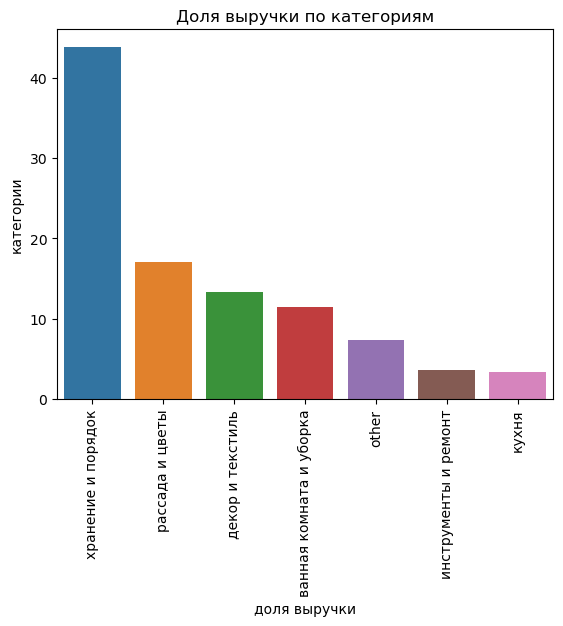

In [102]:
df_cat_sorted = df_cat.sort_values('%_revenue', ascending=False)

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_revenue', order=order)

plt.xlabel('доля выручки')
plt.ylabel('категории')
plt.title('Доля выручки по категориям')

plt.xticks(rotation=90);

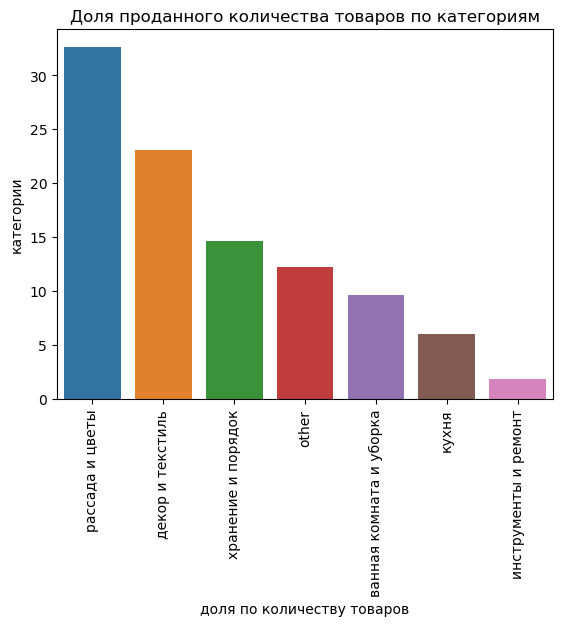

In [103]:
df_cat_sorted = df_cat.sort_values('%_quantity', ascending=False)  

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_quantity', order=order) 

plt.xlabel('доля по количеству товаров')
plt.ylabel('категории')
plt.title('Доля проданного количества товаров по категориям')

plt.xticks(rotation=90);

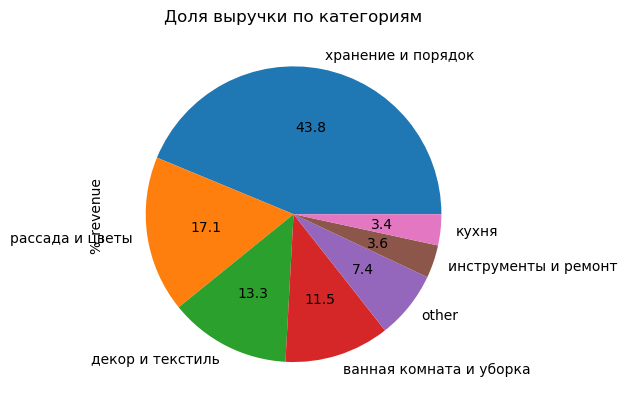

In [104]:
ax = df_cat['%_revenue'].plot.pie(autopct='%.1f')

plt.title('Доля выручки по категориям');

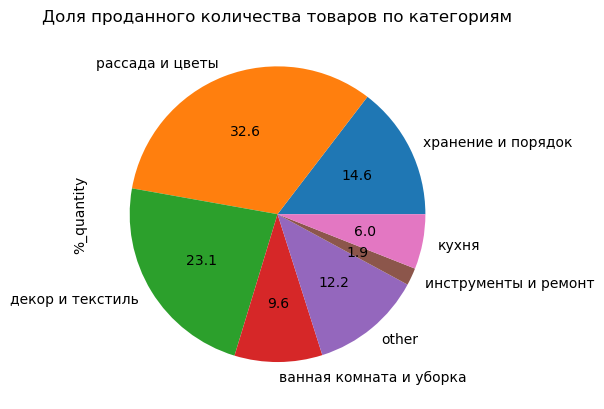

In [105]:
ax = df_cat['%_quantity'].plot.pie(autopct='%.1f')

plt.title('Доля проданного количества товаров по категориям');

<div style="border:solid purple 3px; padding: 20px">
В датасете представлено 2210 уникальных товаров
       
Выделили основные категории товаров это рассада и цветы, кухня, инструменты и ремонт, хранение и порядок, декор и текстиль, ванная комната и уборка, и категория Other. 
    
Больше всего товаров вошло в категорию рассада и цветы, декор и текстиль. Меньше всего в категорию инструменты и ремонт, кухня
    
По сумме продаж больше категория хранение и порядок	 на первом месте, меньше всего по прдажам у категорий инструменты и ремонт, кухня.
    
По количеству проданных товаров на первом месте категория рассада и цветы, на последних те же категории.
    

### Выделим основной и дополнительный ассортимент

#### Для того, чтобы выделить эти 2 вида ассортимента, используем ABC анализ. Потому что он помогает быстро выявить наиболее ценные и приоритетные группы товаров, также ABC анализ опирается на объективный числовой показатель - долю товара в обороте компании. На основе ABC анализа можно выстроить сбалансированную стратегию - уделять 

**Категории:**

**A** - наиболее ценные, приоритетные товары. Формируют основную часть оборота и прибыли компании, но занимают небольшую долю ассортимента. К ним нужно пристальное внимание и забота.

**B** - товары средней значимости и вклада в выручку/прибыль. Требуют меньших усилий по поддержке ассортимента.

**C** - наименее приоритетные товары с невысоким вкладом в оборот. Требуют минимум усилий, часто рассматривается возможность исключения.

**Типичное распределение по группам:**

A - ~80% от оборота, ~20% ассортимента

B - ~15% от оборота, ~30% ассортимента

C - ~5% от оборота, ~50% ассортимента

In [108]:
# Сортировка по выручке  
df_sorted = df_addon.sort_values('sum_total', ascending=False)

# Доля от общей выручки
total_revenue = df_sorted['sum_total'].sum()
df_sorted['revenue_share'] = df_sorted['sum_total'] / total_revenue

# Накопительная доля для определения групп
df_sorted['cumulative_share'] = df_sorted['revenue_share'].cumsum()


In [109]:
# Добавление групп
df_sorted.loc[df_sorted['cumulative_share'] <= 0.8, 'group'] = 'A' 
df_sorted.loc[(df_sorted['cumulative_share'] > 0.8) &  
              (df_sorted['cumulative_share'] <= 0.95), 'group'] = 'B'
df_sorted.loc[df_sorted['cumulative_share'] > 0.95, 'group'] = 'C'

print(df_sorted[['product', 'group']])

                                                product group
1518  простынь вафельная 200х180 см wellness rw180-0...     A
1299  тележка багажная delta тбр-22 синий грузоподъе...     A
1023      набор ножей attribute chef 5 предметов akf522     A
661   урна уличная "гео", hobbyka/хоббика, 59*37,5см...     A
2971  одеяло wellness t142 белое темостеганое 140х20...     A
...                                                 ...   ...
6378      петрушка итальянский гигант 2 г 4660010776553     C
2159                горох амброзия 10,0 г 4660010772616     C
7073   львиный зев волшебный ковер 0,05 г 4660010779639     C
5642  алиссум (лобулярия) снежные одежды 0,2 г 46500...     C
1078   львиный зев волшебный ковер 0,05 г 4660010779639     C

[5247 rows x 2 columns]


In [110]:
df_group = df_sorted.groupby('group').agg({
    'customer_id': 'nunique',
    'quantity': 'sum',  
    'order_id': 'count',
    'product': 'nunique',
    'price': 'mean', 
    'sum_total': 'sum'
}).round(2)

In [111]:
total_revenue = df_group['sum_total'].sum()
df_group['%_revenue'] = (df_group['sum_total'] / total_revenue * 100).round(1) 
 
total_quantity = df_group['quantity'].sum()
df_group['%_quantity'] = (df_group['quantity'] / total_quantity * 100).round(1)

df_group = df_group.sort_values(by='sum_total', ascending=False) 

df_group

,customer_id,quantity,order_id,product,price,sum_total,%_revenue,%_quantity
group,,,,,,,,
A,1187,6048,1559,835,1256.06,2743481.42,80.0,51.9
B,1057,3443,1812,858,227.69,514684.00,15.0,29.5
C,783,2164,1876,801,86.16,171523.00,5.0,18.6


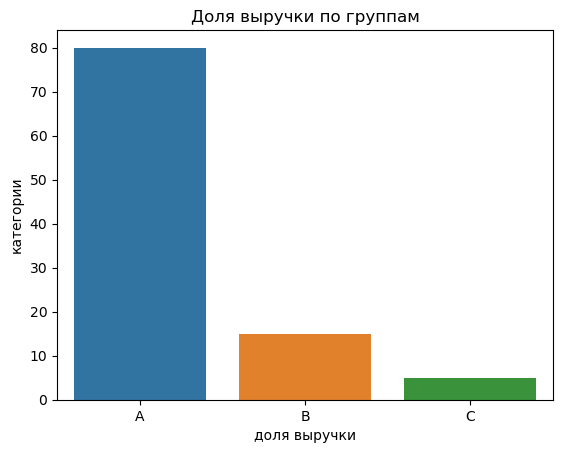

In [112]:
df_cat_sorted = df_group.sort_values('%_revenue', ascending=False)

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_revenue', order=order)

plt.xlabel('доля выручки')
plt.ylabel('категории')
plt.title('Доля выручки по группам');

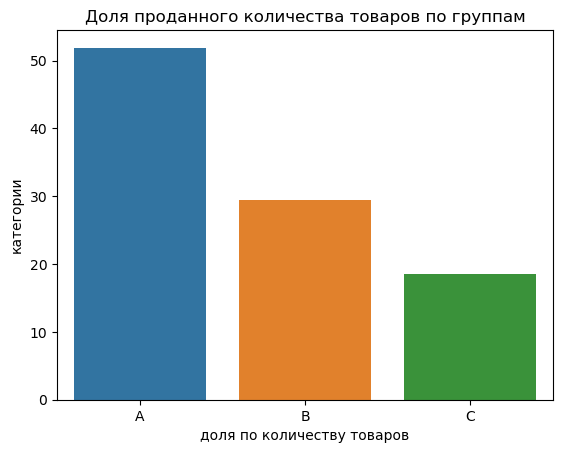

In [113]:
df_cat_sorted = df_group.sort_values('%_quantity', ascending=False)  

order = df_cat_sorted.index.values

ax = sns.barplot(data=df_cat_sorted, x=df_cat_sorted.index, y='%_quantity', order=order) 

plt.xlabel('доля по количеству товаров')
plt.ylabel('категории')
plt.title('Доля проданного количества товаров по группам');

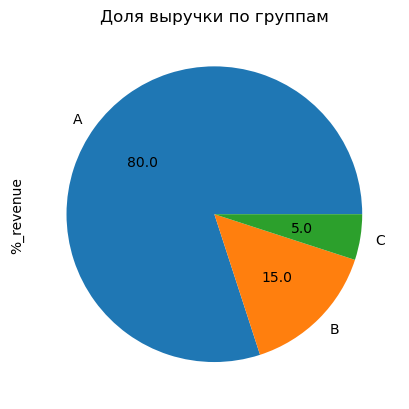

In [114]:
ax = df_group['%_revenue'].plot.pie(autopct='%.1f')

plt.title('Доля выручки по группам');

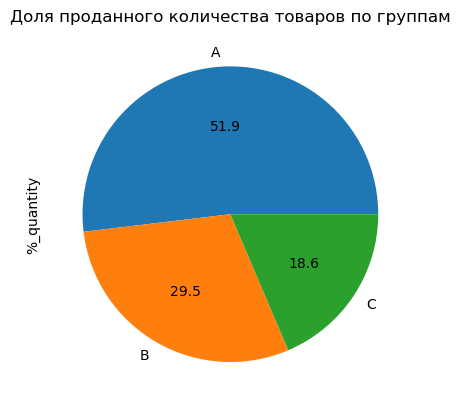

In [115]:
ax = df_group['%_quantity'].plot.pie(autopct='%.1f')

plt.title('Доля проданного количества товаров по группам');

<div style="border:solid purple 3px; padding: 20px">
    
Посредством ABC анализа ассортимента выявили 3 группы товаров, таким образом обозначили основной и дополнительный ассортимент. 

### Проверка статистических гипотез

##### Проверим 2 гипотезы: 
**Сформулируем гипотезы**

**Гипотеза 1**

H1 Доля продаж по категориям товаров одинаковая. 

H0 Существуют категории товаров, на долю которых приходится бо́льшая часть всех продаж интернет-магазина.

**Гипотеза 2**

H0: Спрос (среднее количество продаж) на все категории товаров не зависит от времени суток.

H1: Существуют категории товаров, для которых спрос в разное время суток статистически значимо отличается.

**Гипотеза 3**

H0: Спрос (среднее количество продаж) на все категории товаров одинаков по дням недели.

H1: Существуют категории товаров, для которых спрос по дням недели статистически значимо различается.


**Для проверки гипотез мы будем использовать критерий Стьюдента.** 

Для гипотезы 1 критерий Стьюдента позволяет сравнить средние значения продаж или доли продаж для разных категорий товаров. Это оптимальный способ проверить, есть ли категории-лидеры или нет.

Для гипотез 2, 3 и 4 критерий Стьюдента для независимых выборок даёт возможность сравнить средние показатели продаж категорий товаров в разные периоды времени - по часам, дням, месяцам. Это наиболее прямой способ выявить различия в спросе.

Критерий Стьюдента не требует большого объёма данных и позволяет работать даже с относительно малыми выборками, если распределение не сильно отклоняется от нормального.
Также этот критерий достаточно прост в интерпретации - сравниваются конкретные средние значения показателей.


**Проверим гипотезу 1, о том, что -  Доля продаж по категориям товаров одинаковая.**

In [155]:
p_value = 0.05

# Цикл по категориям
for category in categories:

  # Фильтр данных
  
  # Сравнение со средним
  t_stat, p_value = ttest_1samp(cat_sales, df_addon['sum_total'].mean())
  print(category, "p-value =", p_value )
  
  if p_value < 0.05:
    print(category, "- отвергаем H0, продажи отличаются от среднего")
  else: 
    print(category, "- H0 отвергнуть не получилось")  
    
  # Сравнение с другими
  other_cats = df_addon[df_addon['category'] != category]
  t_stat, p_value = ttest_ind(cat_sales, other_cats['sum_total'])
  print(category, "p-value =", p_value)  
    
  if p_value < 0.05:
    print(category, "- отвергаем H0, продажи отличаются от других категорий")
  else:
    print(category, "- H0 отвергнуть не получилось")


рассада и цветы p-value = 1.257195452014246e-10
рассада и цветы - отвергаем H0, продажи отличаются от среднего
рассада и цветы p-value = 0.00037864113614069137
рассада и цветы - отвергаем H0, продажи отличаются от других категорий
other p-value = 1.257195452014246e-10
other - отвергаем H0, продажи отличаются от среднего
other p-value = 1.5886885600029828e-10
other - отвергаем H0, продажи отличаются от других категорий
хранение и порядок p-value = 1.257195452014246e-10
хранение и порядок - отвергаем H0, продажи отличаются от среднего
хранение и порядок p-value = 4.757946029449399e-16
хранение и порядок - отвергаем H0, продажи отличаются от других категорий
декор и текстиль p-value = 1.257195452014246e-10
декор и текстиль - отвергаем H0, продажи отличаются от среднего
декор и текстиль p-value = 4.447420597531984e-14
декор и текстиль - отвергаем H0, продажи отличаются от других категорий
ванная комната и уборка p-value = 1.257195452014246e-10
ванная комната и уборка - отвергаем H0, продаж

<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу 1, о том, что Доля продаж по категориям товаров одинаковая. Мы выявили, что статистически значимые разлия есть и гипотеза не подтвердилась.     

**Проверим гипотезу 2, о том, что спрос (среднее количество продаж) на все категории товаров не зависит от времени суток.**

In [167]:
p_value = 0.05
morning_sales = df_addon[df_addon['hours'] < 12]['quantity']  
evening_sales = df_addon[df_addon['hours'] >= 12]['quantity']

alpha = .05 # критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу.

results = st.ttest_ind(
    morning_sales, 
    evening_sales,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0472509605300663
Отвергаем нулевую гипотезу


<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу 2, о том, что Спрос (среднее количество продаж) на все категории товаров не зависит от времени суток. Мы выявили, что статистически значимые разлия есть и гипотеза не подтвердилась.  

**Проверим гипотезу 2, о том, что спрос (среднее количество продаж) на все категории товаров не зависит дня недели.**

In [169]:
day1 = df_addon.query('day > 5')['quantity']
day2 = df_addon.query('day < 6')['quantity']

alpha = .05 # критический уровень статистической значимости, если pvalue окажется меньше него, отвергнем гипотезу.

results = st.ttest_ind(
    day1, 
    day2,
    nan_policy ='omit'
)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.012448634747964716
Отвергаем нулевую гипотезу


<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу 3, о том, что спрос (среднее количество продаж) на все категории товаров не зависит дня недели. Мы выявили, что статистически значимые разлия есть и гипотеза не подтвердилась.  

<div style="border:solid green 3px; padding: 20px">

**Итоговый вывод:**
    
В датасете представлены данные за период с 01.10.2018 по 31.01.2020. 

Больше всего заказов по кол-ву и по сумме в пн и вт, меньше в сб, вс. 
По часам больше заказов в период с 12 по 13 часов. Пик в 13 часов. По сумме с 11 по 14 часов. Пик 11-12. 
    
Меньше всего по кол-ву и по сумме ночью с 12 часов до утра 7. 

Самое большое кол-во заказов по месяцам с учетом года февраль 2019, декабрь 2018 (также по сумме продаж), меньше всего заказов в январе и июне 2019 (также по сумме продаж). По сумме продаж также декабрь 2018 и октябрь 2018. Меньше продаж по сумме ноябрь 2019 и июнь 2019.
    
Больше всего было продано по сумме продаж - сумка-тележка 2-х колесная gimi argo синяя, топ -3 по прдажам это сумки тележки, также большая часть топа это сумки тележки в разных конфигурациях. 
    
Больше всего по кол-ву было продано пеларгония розебудная red pandora, также большую часть топа занимают данные растения.
    
В датасете представлено 2210 уникальных товаров
       
Выделили основные категории товаров это рассада и цветы, кухня, инструменты и ремонт, хранение и порядок, декор и текстиль, ванная комната и уборка, и категория Other. 
    
Больше всего товаров вошло в категорию рассада и цветы, декор и текстиль. Меньше всего в категорию инструменты и ремонт, кухня
    
По сумме продаж больше категория хранение и порядок	 на первом месте, меньше всего по прдажам у категорий инструменты и ремонт, кухня.
    
По количеству проданных товаров на первом месте категория рассада и цветы, на последних те же категории.    

Посредством ABC анализа ассортимента выявили 3 группы товаров, таким образом обозначили основной и дополнительный ассортимент. 
    
Проверили статистические гипотезы: 
- Доля продаж по категориям товаров одинаковая
- Спрос (среднее количество продаж) на все категории товаров не зависит от времени суток 
- Спрос (среднее количество продаж) на все категории товаров одинаков по дням недели. 
Ни одна гипотеза не подтвердилась.     
    

## Презентация

In [116]:
# ссылка

## Дашборд

In [117]:
# ссылка

Набор №1

1. Постройте диаграмму количества покупок по дням.
2. Добавьте индикатор количества покупателей.
3. Добавьте фильтр дашборда по дате совершения покупки.

Набор №2

1. Постройте диаграмму, отображающую сумму покупок по дням.
2. Постройте гистограмму, отображающую распределение заказов по сумме.
3. Добавьте фильтр дашборда по дате совершения покупки.